# Task 5

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.linalg import svd
import pandas as pd

file = open('lambtest.txt')

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(file)
data = pd.DataFrame(x.toarray(), columns = vectorizer.get_feature_names())

U, s, V = svd(data)

# Task 9

For sorting purposes there're might be used function to_sorted_list() from Reactive Python operators, however, it doesn't work on my computer. Therefore this code is not quite 'pure' for technical reasons.

In [2]:
import rx
import re
from rx import operators as ops
from rx import create
from rx import from_

o = from_(open('lambtest.txt')).pipe(ops.map(lambda l: l.lower()),
                                     ops.map(lambda w: re.sub(r'[^\w\s]','', w)),
                                     ops.map(lambda i: i.split()),
                                     ops.map(lambda x: sorted(x, key = len, reverse = True)),
                                     ops.map(lambda a: a[0])
)
o.subscribe(lambda val: print(val))

sages
animals
beautiful
strong
unicorn
concealed
called
capture
masters
places
animals
forest
parable
forest
rightly
unicorn
desires
which
master
together
forest
justly
rightly
attained
everywhere
augustus


# Task 10

Please enter a sequence of numbers separated by comma to check the validity of code on another example.

Used sources:

https://ninmesara.github.io/RxPY/api/operators/scan.html

In [3]:
numbers = input().split(",")

result = from_(numbers).pipe(ops.scan(lambda num, i: max(num, i)),
                             ops.distinct(),
                             ops.to_list()
)
result.subscribe(lambda s: print("Result: ", len(s)-1))

1,1,1,0,0,2,2,3
Result:  2


# Task 11

Used sources:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [4]:
import numpy as np

points = np.array([[0, 0], [1, 0], [2, 0], [0, 1], [2, 1], [0, 2], [1, 2], [2, 2]])

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(points, 'complete', 'cityblock')
dendrogram(linked)
plt.title("Hierarchical clustering (linkage: COMPLETE, distance: TAXICAB)")
plt.show()

<Figure size 640x480 with 1 Axes>

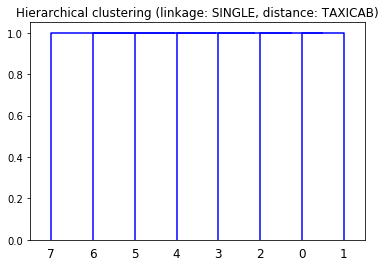

In [6]:
linked = linkage(points, 'single', 'cityblock')
dendrogram(linked)
plt.title("Hierarchical clustering (linkage: SINGLE, distance: TAXICAB)")
plt.show()

# Task 12

Used sources: 

https://networkx.github.io/documentation/networkx-.10/tutorial/tutorial.html

https://networkx.github.io/documentation/networkx-.9/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html

https://networkx.github.io/documentation/networkx-.9/reference/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html

In [7]:
import networkx as nx

network = nx.Graph()

network.add_nodes_from([6, 4, 7, 8, 5, 9, 1, 3, 2, 0])
network.add_edges_from([(7, 8), (6, 8), (4, 8), (5, 8), (8, 9), (1, 9), (3, 9), (2, 9)])

matrix = nx.adjacency_matrix(network)
print("Adjacency matrix:") 
print(matrix.todense(), "\n")

edge_centrality = nx.edge_betweenness_centrality(network)
print("Edge betweennes centrailty of edge (8, 9): ")
print(edge_centrality[(8, 9)])

Adjacency matrix:
[[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [1 1 1 0 1 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 1 1 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]] 

Edge betweennes centrailty of edge (8, 9): 
0.4444444444444445
